# Imported packages

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer, confusion_matrix


%matplotlib notebook

In [10]:
%matplotlib inline

#  PART 1 -- MNIST


# Loading the data

MNIST dataset consists of black and white images of hand-written digits from $0$ to $9$ of size $28 \times 28$.
In this exercise we will work with a small from the original MNIST dataset. 

Hence, the observations $(X_1, Y_1), \ldots, (X_n, Y_n)$ are such that $X_i \in \mathbb{R}^{784}$ and $Y_i \in \{0, \ldots, 9\}$. To be more precise, each component of vector $X_i$ is a number between $0$ and $255$, which signifies the intensity of black color.

The initial goal is to build a classifier $\hat g$, which receives a new image $X$ and outputs the number that is present on the image.

In [11]:
X_train = np.load('data/mnist1_features_train.npy', allow_pickle=True)
y_train = np.load('data/mnist1_labels_train.npy', allow_pickle=True)
X_test = np.load('data/mnist1_features_test.npy', allow_pickle=True)
y_test = np.load('data/mnist1_labels_test.npy', allow_pickle=True)

n_samples, n_features = X_train.shape # extract dimensions of the design matrix
print('Train data contains: {} samples of dimension {}'.format(n_samples, n_features))
print('Test data contains: {} samples'.format(X_test.shape[0]))

Train data contains: 2000 samples of dimension 784
Test data contains: 200 samples


In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Looking at the data

Since each observation is actually an image, we can visualize it.

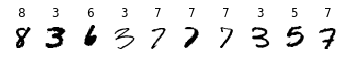

In [13]:
axes = plt.subplots(1, 10)[1]  # creates a grid of 10 plots

images_and_labels = list(zip(X_train, y_train)) 
for ax, (image, label) in zip(axes, images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('{}'.format(label))

In [14]:
for i in range(10):
    print('Number of {}s in the train dataset is {}'.format(i, np.sum([y_train == str(i)])))

Number of 0s in the train dataset is 196
Number of 1s in the train dataset is 226
Number of 2s in the train dataset is 214
Number of 3s in the train dataset is 211
Number of 4s in the train dataset is 187
Number of 5s in the train dataset is 179
Number of 6s in the train dataset is 175
Number of 7s in the train dataset is 225
Number of 8s in the train dataset is 186
Number of 9s in the train dataset is 201


From the above we conclude that the dataset is rather balanced, that is, each class contains similar amount of observations. The rarest class is $y = 6$ with $175$ examples and the most common class is $y = 2$ with $226$ examples

# Cross-validation with GridSearchCV

In [15]:
# GridSearchCV with kNN : a simple baseline
knn = KNeighborsClassifier() # defining classifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5]} # defining parameter space
clf = GridSearchCV(knn, parameters, cv=3)
clf.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf.best_params_))
print('Best classification accuracy in train is: {}'.format(clf.best_score_))
print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))

Returned hyperparameter: {'n_neighbors': 1}
Best classification accuracy in train is: 0.891497944721333
Classification accuracy on test is: 0.875


In [17]:
# SVM Classifier + Pipeline
svc = LinearSVC(max_iter=5000)
pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters3 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf3 = GridSearchCV(pipe, parameters3, cv=3)
clf3.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf3.best_params_))
print('Best classification accuracy in train is: {}'.format(clf3.best_score_))
print('Classification accuracy on test is: {}'.format(clf3.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best classification accuracy in train is: 0.863002432717575
Classification accuracy on test is: 0.84


In [18]:
# Logistic regression
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=5000))])
parameters4 = {'logreg__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf4 = GridSearchCV(pipe, parameters4, cv=3)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best classification accuracy in train is: {}'.format(clf4.best_score_))
print('Classification accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'logreg__C': 0.0078125}
Best classification accuracy in train is: 0.8705039372205788
Classification accuracy on test is: 0.84


In [19]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

# GridSearchCV with Ra,dom Forest : a simple baseline
rf = RandomForestClassifier(random_state=0) # defining classifier
parameters6 = {'max_depth': range(1,16),'n_estimators': [100,200,300,400,500]} # defining parameter space
clf6 = GridSearchCV(rf, parameters6, cv=3)
clf6.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf6.best_params_))
print('Best classification accuracy in train is: {}'.format(clf6.best_score_))
print('Classification accuracy on test is: {}'.format(clf6.score(X_test, y_test)))

Returned hyperparameter: {'max_depth': 14, 'n_estimators': 300}
Best classification accuracy in train is: 0.9110024567295931
Classification accuracy on test is: 0.925


# Visualizing errors

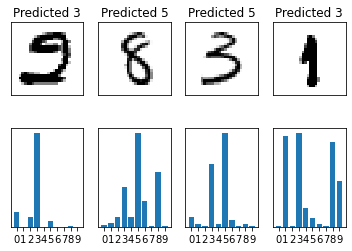

In [20]:
axes = plt.subplots(2, 4)[1]  # creates a grid of 10 plots

y_pred = clf4.predict(X_test)
j = 0 # Index which iterates over plots
for true_label, pred_label, image in list(zip(y_test, y_pred, X_test)):
    if j == 4: # We only want to look at 4 first mistakes
        break
    if true_label != pred_label:
        # Plotting predicted probabilities
        axes[1, j].bar(np.arange(10), clf4.predict_proba(image.reshape(1, -1)).flatten())
        axes[1, j].set_xticks(np.arange(10))
        axes[1, j].set_yticks([])
        
        # Plotting the image
        axes[0, j].imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
        axes[0, j].set_xticks([])
        axes[0, j].set_yticks([])
        axes[0, j].set_title('Predicted {}'.format(pred_label))
        j += 1
        
#         plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#         axex[1, j].plot()

In [21]:
clf4.predict_proba(image.reshape(1, -1)).flatten().shape == (10,)

True

In [22]:
clf4.predict_proba(image.reshape(1, -1)).flatten()

array([3.11668828e-06, 7.00448538e-06, 4.53068033e-05, 6.18559475e-05,
       1.75252443e-05, 1.15442442e-05, 7.77871715e-07, 9.99552118e-01,
       2.76869592e-05, 2.73064085e-04])

In [23]:
clf4.predict_proba(image.reshape(1, -1)).shape

(1, 10)

In [24]:
clf4.predict_proba(image.reshape(1, -1))

array([[3.11668828e-06, 7.00448538e-06, 4.53068033e-05, 6.18559475e-05,
        1.75252443e-05, 1.15442442e-05, 7.77871715e-07, 9.99552118e-01,
        2.76869592e-05, 2.73064085e-04]])

# Changing the Loss function

Here we want to understand how to change the cross-validation metric with minimal effort.

In [25]:
# SVM Classifier + Pipeline + New score function

pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters4 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
balanced_scorer = make_scorer(balanced_accuracy_score)

clf4 = GridSearchCV(pipe, parameters3, cv=3, scoring=balanced_scorer)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf4.best_score_))
print('Balanced accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best Balanced accuracy in train is: 0.8612334093654231
Balanced accuracy on test is: 0.825627008328415


In [26]:
print(confusion_matrix(y_test, clf4.predict(X_test)))

[[22  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  2  0]
 [ 0  0 14  1  1  0  0  0  0  0]
 [ 0  0  0 18  0  3  0  0  1  1]
 [ 0  1  0  0 17  0  0  0  0  2]
 [ 1  0  0  1  0  6  0  1  0  1]
 [ 1  2  1  0  0  0 20  0  0  0]
 [ 0  0  0  0  1  0  0 15  0  0]
 [ 0  2  0  1  0  3  0  0 11  0]
 [ 0  0  0  0  2  0  0  2  1 21]]


# PART 2 -- Problem

The data that we have contains images with $10$ classes. Normally, accuracy is a reasonable choice of the loss function to be optimized, but in this problem we *really* do not like when digits from $\{5, 6, 7, 8, 9\}$ are predicted to be from $\{0, 1, 2, 3, 4\}$.

Here we're gonna propose a loss function that would address our needs, make an ML pipeline that uses our loss function and finds appropriate classifiers.

In [27]:
import tensorflow as tf ; print(tf.__version__)
import keras
import keras.backend as K

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import wrappers
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.utils import np_utils, to_categorical

2.3.1


In [28]:
def my_custom_loss_func(y_true,y_pred):
    
    max_val_true = tf.reduce_max(y_true, keepdims=True)
    cond_true = tf.equal(y_true, max_val_true)
    true = tf.where(cond_true)
    true = tf.dtypes.cast(true, tf.int32)
    
    max_val_pred = tf.reduce_max(y_pred, keepdims=True)
    cond_pred = tf.equal(y_pred, max_val_pred)
    pred = tf.where(cond_pred)
    pred = tf.dtypes.cast(pred, tf.int32)
    
    loss = K.categorical_crossentropy(y_true, y_pred)
    custom_loss = K.switch((K.greater(true[0][0], tf.constant(4))) & 
                           (K.greater(tf.constant(5), pred[0][0])), loss*2, loss)
    
    return(custom_loss)

In [29]:
y_train = list(map(int, y_train.tolist()))
y_train = to_categorical(y_train, num_classes=10)
y_test = list(map(int, y_test.tolist()))
y_test = to_categorical(y_test, num_classes=10)
image_size = X_train.shape[1]

In [30]:
#tf.random.set_seed(1)

def create_model(optimizer='sgd'):
    model = Sequential()
    model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=my_custom_loss_func, metrics=['accuracy'])
    return(model)

clf1 = KerasClassifier(build_fn=create_model, batch_size=128, epochs=30, verbose=0)
pipe = Pipeline([('scaler', MaxAbsScaler()),('clf',clf1)])
param_grid = dict(optimizer = ['sgd', 'RMSprop', 'Adam'],
                  epochs = [20,30,40],
                  batch_size = [32, 64, 128])
clf2 = GridSearchCV(clf1, param_grid, n_jobs=-1, cv=3) #n_jobs=-1 utilise tout les coeurs dispo (parallel computing)
clf2.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf2.best_params_))
print('Best classification accuracy in train is: {}'.format(clf2.best_score_))
print('Classification accuracy on test is: {}'.format(clf2.score(X_test, y_test)))

Returned hyperparameter: {'batch_size': 32, 'epochs': 40, 'optimizer': 'RMSprop'}
Best classification accuracy in train is: 0.8470141887664795
Classification accuracy on test is: 0.8550000190734863
